In [1]:
using Plots, ApproxFun, LinearAlgebra, SpecialFunctions

We demonstrate numerical solution of the examples in [Hale & Olver 2016]:

##### Example 1

$$y(x) + {}_{-1} {\cal Q}_x^{1/2} y(x) = 1$$

┌ Warning: You have set `PLOTS_DEFAULT_BACKEND=GR` but `Plots` is not loaded.
└ @ Plots /Users/solver/.julia/packages/Plots/rmogG/src/backends.jl:149


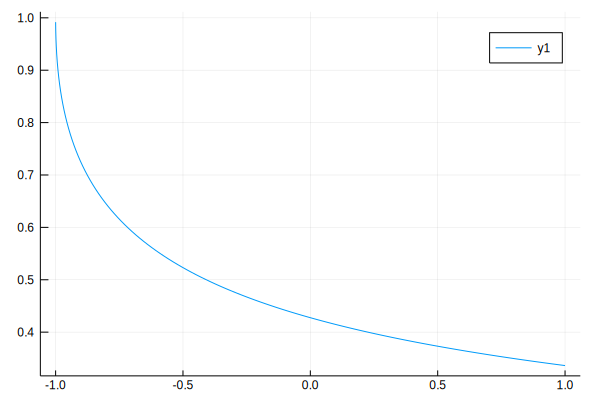

In [2]:
S  = Legendre() ⊕ JacobiWeight(0.5,0.,Ultraspherical(1))
Q½ = LeftIntegral(S,0.5)

y = (I+Q½) \ 1
plot(y)

We can compare with the exact solution:

In [3]:
x = Fun()
norm(exp(1+x)*erfc(sqrt(1+x))-y)

2.718503658159304e-15

##### Example 2

$$y + e^{-{1+x \over 2}} {}_{-1}Q_x^{1/2}[e^{1+x \over 2} y] = e^{-{1+x \over 2}}$$

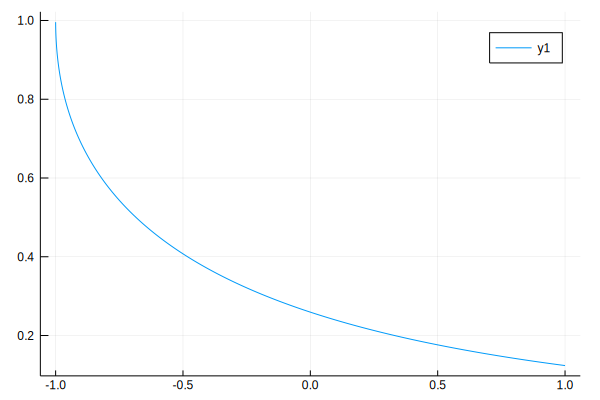

In [5]:
S = Legendre() ⊕ JacobiWeight(0.5,0.,Ultraspherical(1))
x = Fun()
Q½= LeftIntegral(S,0.5)

y = (I+exp(-(1+x)/2)*Q½[exp((1+x)/2)]) \ exp(-(1+x)/2)
plot(y)

We can compare with the exact solution:

In [6]:
norm(y-exp((1+x)/2)*erfc(sqrt(1+x)))

2.025910271065939e-15

In [7]:
S_x = Legendre() ⊕ JacobiWeight(0.5,0.,Ultraspherical(1))
S_t = Chebyshev(0..1)
B = 
D_15 = LeftDerivative(1.5) : S_x
D_t = Derivative() : S_t

u_0 = Fun(Fun(x -> (1-x^2)), S)

u =\( [  ldirichlet(S_t) ⊗ I;
      I ⊗ rdirichlet(S_x);
      D_t ⊗ I - I ⊗ D_15] , [u_0; 0; 0] ; tolerance = 1E-3)

Fun(Chebyshev(0..1)⊗Legendre()⊕(1+x)^0.5[Ultraspherical(1)],[1.40118, -2.26005, 0.896061, -4.48979, 2.40879, -4.94247, -8.08572, -3.87707, 2.6967, -8.48838  …  7.31516e-6, -9.67778e-7, -2.85509e-6, 2.97246e-6, 1.09617e-5, 7.83398e-7, 1.85372e-6, 5.97417e-7, 1.11521e-6, -1.69045e-6])

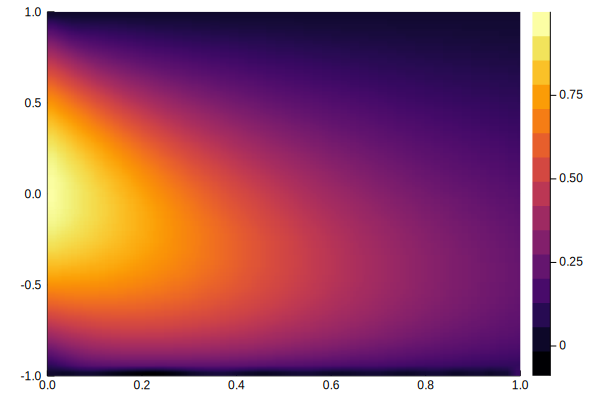

In [8]:
tt = range(0, stop=1,length=51)
xx = range(-1, stop=1,length=50)

contourf(tt, xx, u.(tt', xx))